In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import pandas as pd

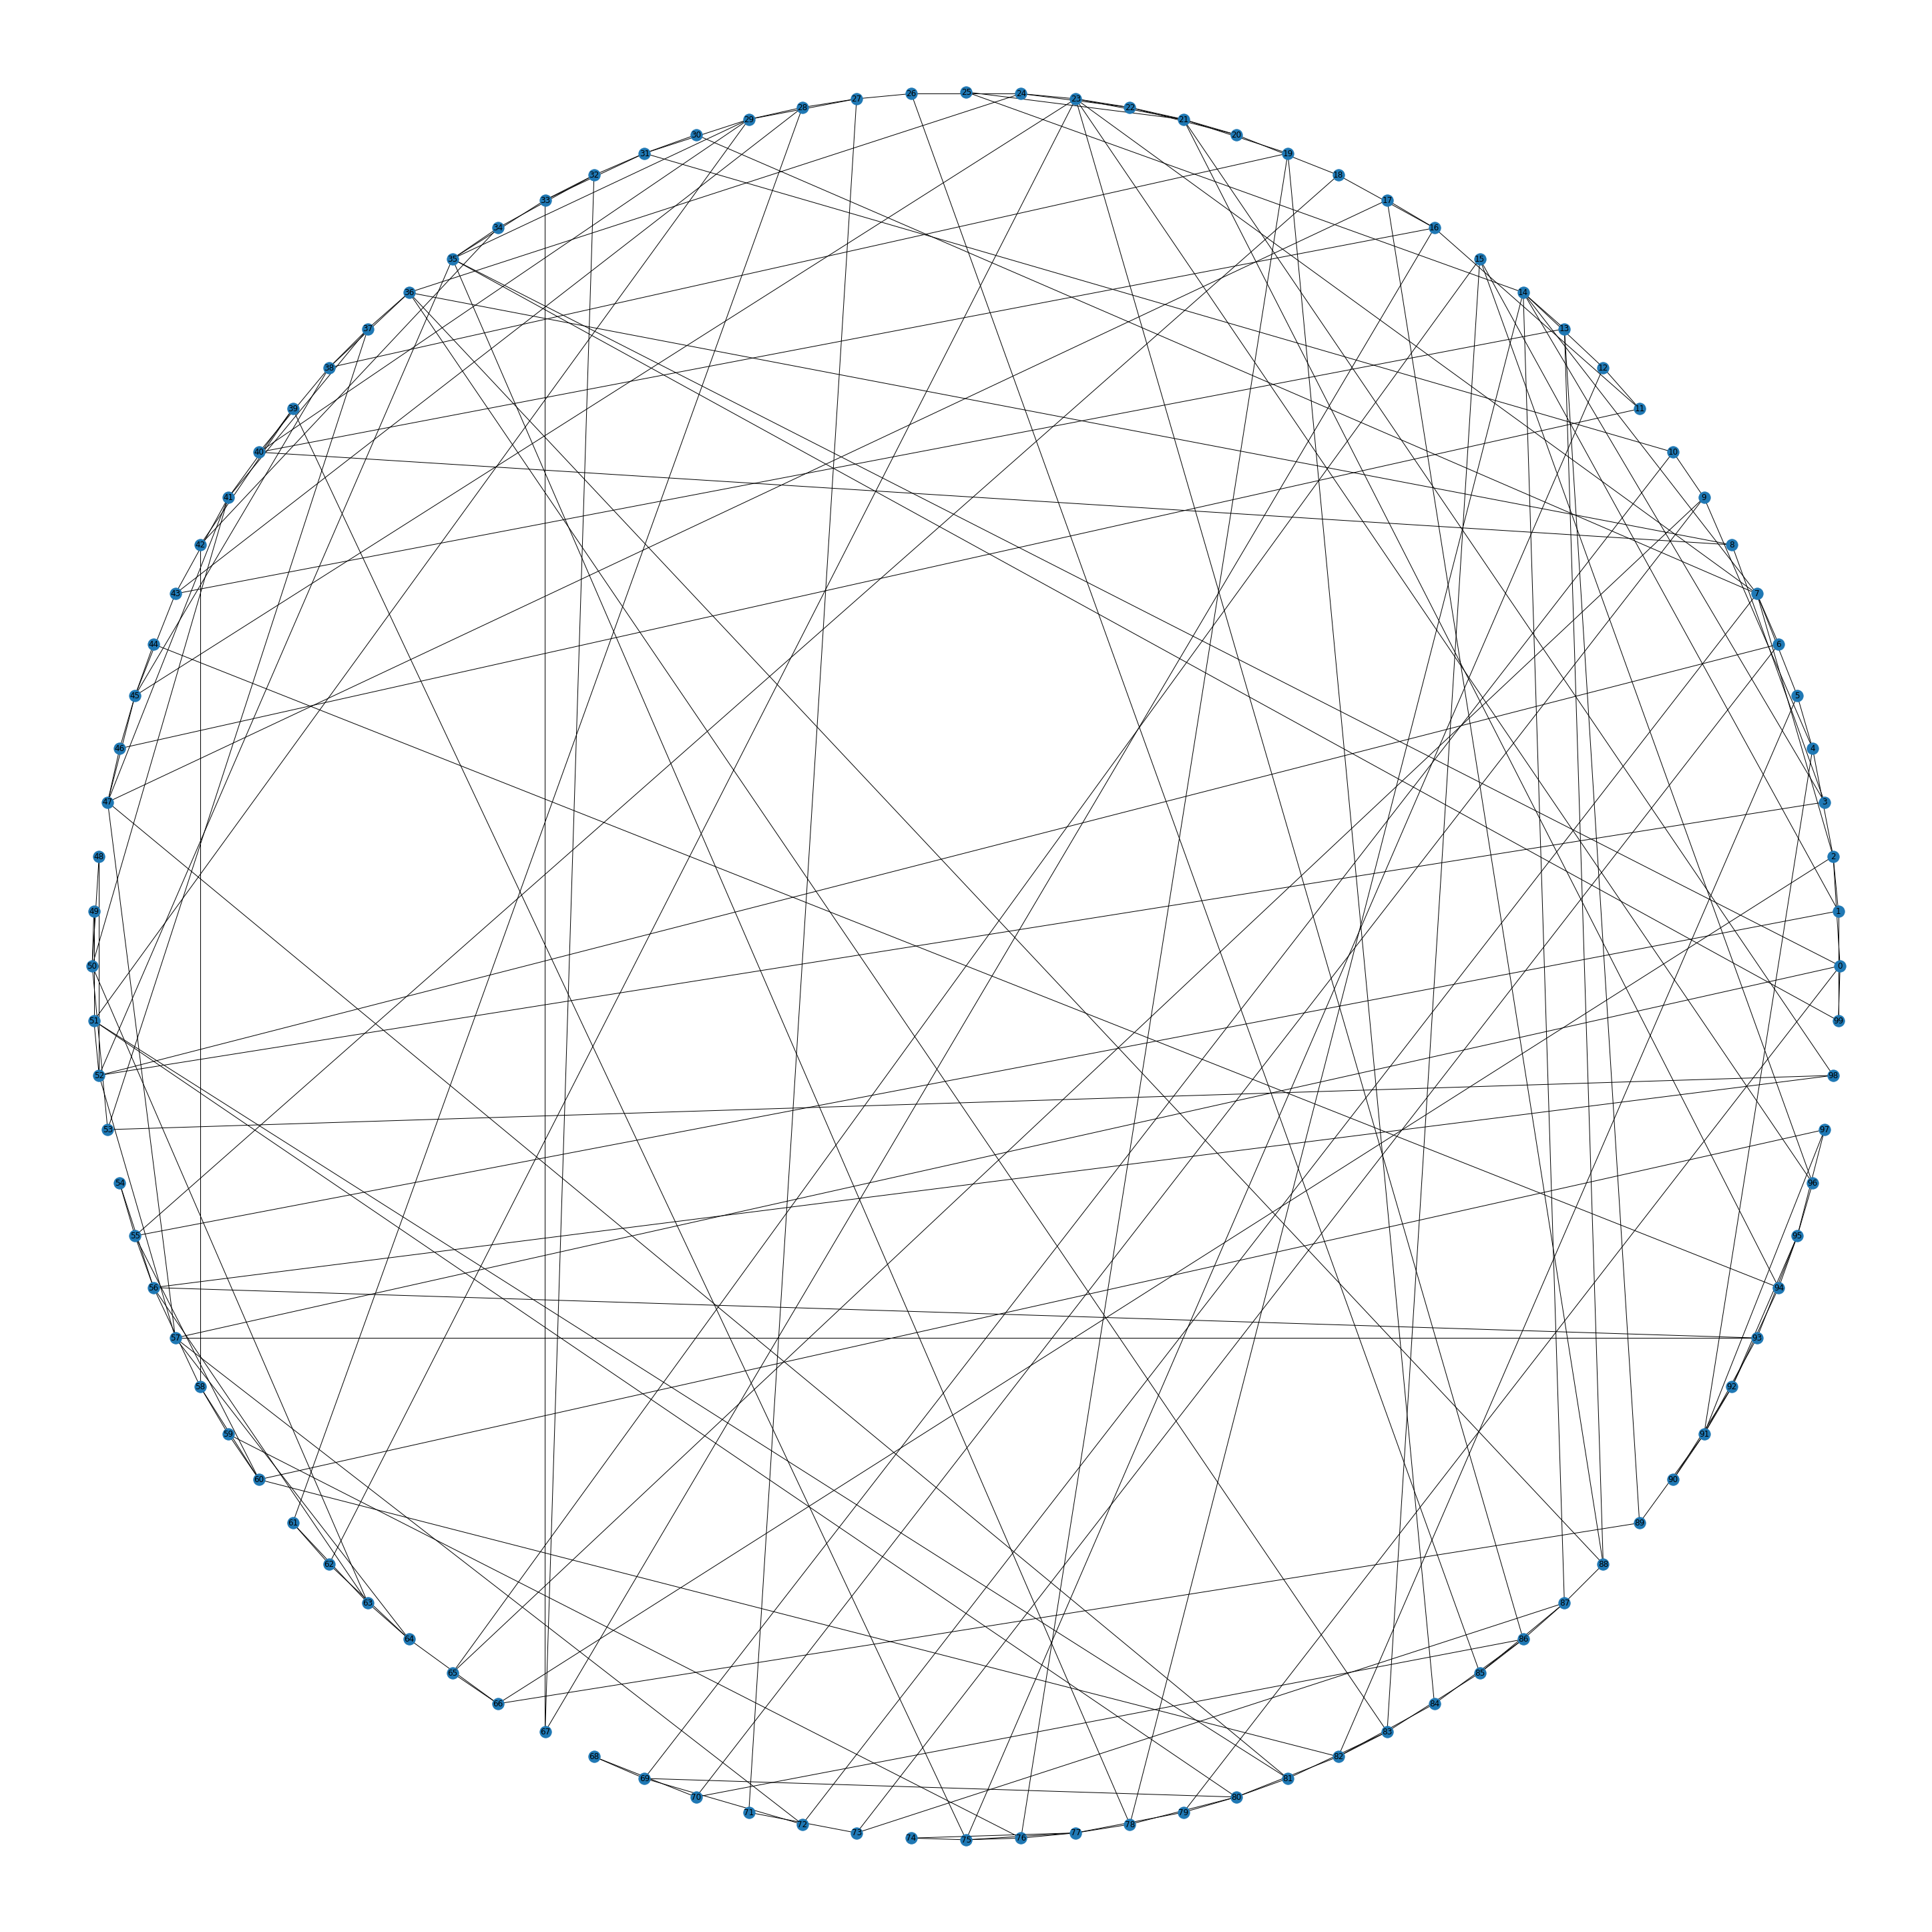

In [3]:
g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)
plt.figure(figsize=(40,40))
nx.draw_circular(g, with_labels = True)

(-0.8019009331149721,
 0.8464527517012865,
 -0.844746422128942,
 1.0878450677204259)

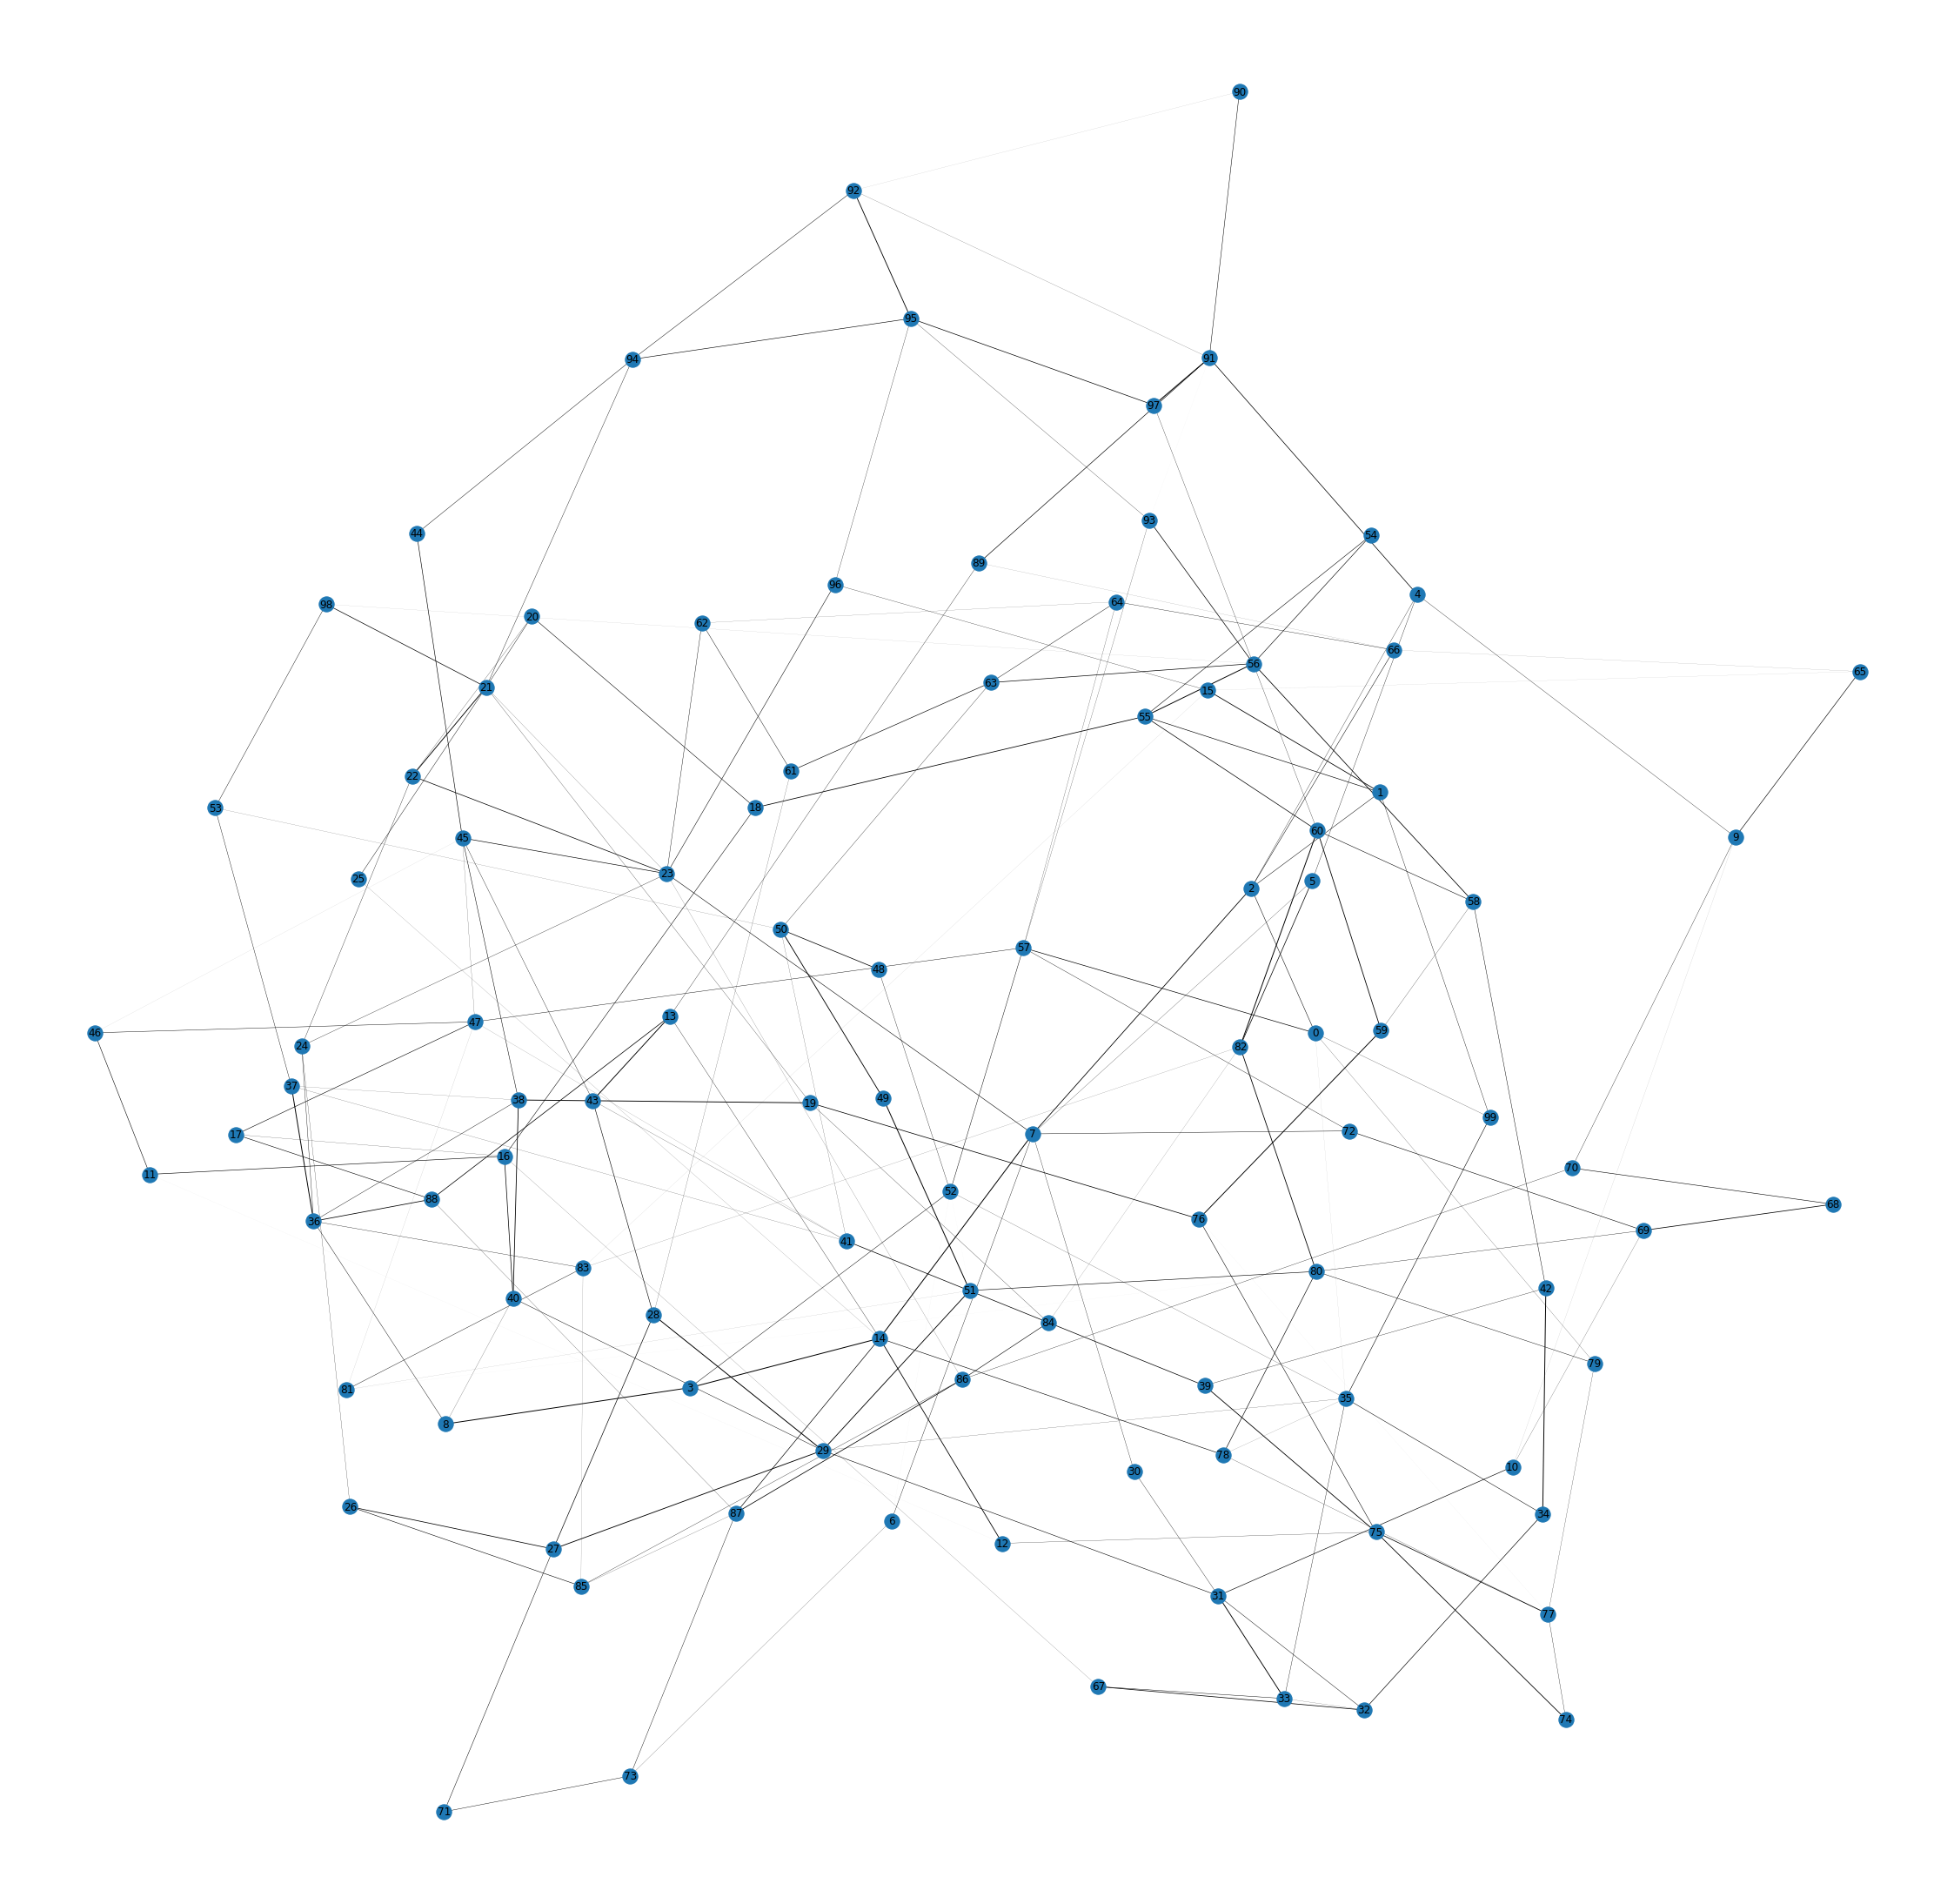

In [4]:
E = g.number_of_edges()
#initializing random weights
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)
k = 0
for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1
import matplotlib.pyplot as plt
edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]
# layout
#pos = nx.spring_layout(G, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
# rendering
plt.figure(figsize=(40,40))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

In [5]:
class Graph:
     
    adj = []
 
    # Function to fill empty adjacency matrix
    def __init__(self, v, e):
         
        self.v = v
        self.e = e
        Graph.adj = [[0 for i in range(v)]
                        for j in range(v)]
 
    # Function to add an edge to the graph
    def addEdge(self, start, e):
         
        # Considering a bidirectional edge
        Graph.adj[start][e] = 1
        Graph.adj[e][start] = 1
 
    # Function to perform DFS on the graph
    def BFS(self, start):
         
        # Visited vector to so that a
        # vertex is not visited more than
        # once Initializing the vector to
        # false as no vertex is visited at
        # the beginning
        visited = [False] * self.v
        q = [start]
 
        # Set source as visited
        visited[start] = True
 
        while q:
            vis = q[0]
 
            # Print current node
            print(vis, end = ' ')
            q.pop(0)
             
            # For every adjacent vertex to
            # the current vertex
            for i in range(self.v):
                if (Graph.adj[vis][i] == 1 and
                      (not visited[i])):
                           
                    # Push the adjacent node
                    # in the queue
                    q.append(i)
                     
                    # set
                    visited[i] = True
 
# Driver code
v, e = 5, 4
 
# Create the graph
G = Graph(v, e)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(1, 3)
 
# Perform BFS
G.BFS(0)

0 1 2 3 

In [6]:
def randomDSM(n):
    A = []
    for i in range(n):
        row = []
        for j in range(n):
            if j == i:
                row.append(0)
            else:
                row.append(random.randint(0, 1))
        A.append(row)
    return A

In [7]:
def ppm(A):
    """Pretty Print matrix"""
    print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in A]))

In [8]:
def plot_graph(A):
    Anp = np.matrix(A)
    g = nx.from_numpy_matrix(Anp, create_using=nx.DiGraph)

    # layout
    #pos = nx.spring_layout(G, iterations=50)
    pos = nx.spring_layout(g)
    labels = {}
    for i in range(Anp[0].size):
        labels[i] = str(i)
    # rendering
    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos, node_size=1000, arrows=True)
    nx.draw_networkx_labels(g, pos, labels)
    plt.axis('off')

In [17]:
def randomProbMatrix(A):
    for i, row in enumerate(A):
        for j, element in enumerate(row):
            if element != 0:
                A[i][j] = random.random()
    return A


0	1	0	0	0	0
1	0	1	0	0	1
1	0	0	1	0	0
0	1	1	0	1	1
1	0	1	0	0	1
0	0	0	0	1	0
0	0.8897418475207213	0	0	0	0
0.2113310994149924	0	0.9369740714723499	0	0	0.11756887274458627
0.5127940070821047	0	0	0.48333116330029724	0	0
0	0.7555267894440466	0.5932580092785189	0	0.7919666159720188	0.14438514857246354
0.2799824318713553	0	0.2949412351513332	0	0	0.34326987648816876
0	0	0	0	0.4505520084343887	0
0	0.331471361345285	0	0	0	0
0.854856868471227	0	0.019772615505044278	0	0	0.2700673215906223
0.8193232538915843	0	0	0.43431825012718783	0	0
0	0.2980844495452225	0.4062603602199265	0	0.7469323290091655	0.25061730390084835
0.973955830492185	0	0.844986235989767	0	0	0.10361006903299108
0	0	0	0	0.1266284097487288	0


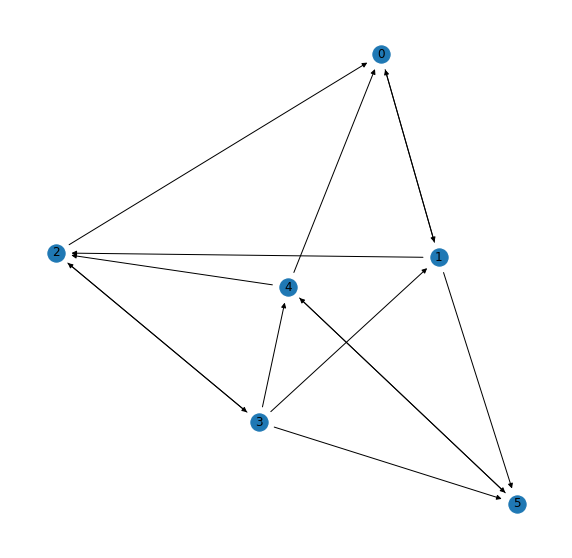

In [21]:
n = 6
A = randomDSM(n)
ppm(A)
plot_graph(A)

L = randomProbMatrix(A)
ppm(L)
I = randomProbMatrix(A)
ppm(I)

In [6]:
for i, row in enumerate(A):
    print(row)
    for j, element in enumerate(row):
        if element == 1:
            print(f"There is a link between {i} and {j}")


[0, 1, 0, 0]
There is a link between 0 and 1
[0, 0, 0, 1]
There is a link between 1 and 3
[1, 1, 0, 1]
There is a link between 2 and 0
There is a link between 2 and 1
There is a link between 2 and 3
[1, 1, 0, 0]
There is a link between 3 and 0
There is a link between 3 and 1


In [7]:
def bfs(matrix, row, col, visited):
    nodes = [(row, col)]
    while nodes:
        row, col = nodes.pop(0)
        # the below conditional ensures that our algorithm 
        #stays within the bounds of our matrix.
        if row >= len(matrix) or col >= len(matrix[0]) or row < 0 or col < 0:
            continue
        if (row, col) not in visited:
            if matrix[row][col] == 1:
                visited.append((row, col))
                nodes.append((row+1, col))
                nodes.append((row, col+1))
                nodes.append((row-1, col))
                nodes.append((row, col-1))

def bfs_wrapper(matrix):
    visited = []
    for i in range(len(matrix)):
        #print(f"Current row: {i}")
        for j in range(len(matrix[0])):
            #print(f"  Current column: {j}")
            if (i,j) not in visited:
                print(f"Element ({i}, {j}) was not visited before")
                bfs(matrix, i, j, visited)
            else:
                print(f"Element ({i}, {j}) was visited before")
            
    return visited

In [8]:
bfs_wrapper(A)

Element (0, 0) was not visited before
Element (0, 1) was not visited before
Element (0, 2) was not visited before
Element (0, 3) was not visited before
Element (1, 0) was not visited before
Element (1, 1) was not visited before
Element (1, 2) was not visited before
Element (1, 3) was not visited before
Element (2, 0) was not visited before
Element (2, 1) was visited before
Element (2, 2) was not visited before
Element (2, 3) was visited before
Element (3, 0) was visited before
Element (3, 1) was visited before
Element (3, 2) was not visited before
Element (3, 3) was not visited before


[(0, 1), (1, 3), (2, 3), (2, 0), (3, 0), (2, 1), (3, 1)]

In [11]:
# Python program to print all paths from a source to destination.
  
from collections import defaultdict
  
# This class represents a directed graph
# using adjacency list representation
class Graph:
  
    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices
         
        # default dictionary to store graph
        self.graph = defaultdict(list)
  
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
  
    '''A recursive function to print all paths from 'u' to 'd'.
    visited[] keeps track of vertices in current path.
    path[] stores actual vertices and path_index is current
    index in path[]'''
    def printAllPathsUtil(self, u, d, visited, path):
 
        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)
 
        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            print(path)
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path)
                     
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False
  
  
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d):
 
        # Mark all the vertices as not visited
        visited =[False]*(self.V)
 
        # Create an array to store paths
        path = []
 
        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path)
  
  
  
# Create a graph given in the above diagram
g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(0, 3)
g.addEdge(2, 0)
g.addEdge(2, 1)
g.addEdge(1, 3)
  
s = 0 ; d = 1
print ("Following are all different paths from % d to % d :" %(s, d))
g.printAllPaths(s, d)

Following are all different paths from  0 to  1 :
[0, 1]
[0, 2, 1]
